In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from scipy.stats import multivariate_normal
from sklearn import linear_model
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import statsmodels.api as sm
import seaborn
from collections import Counter

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
war_and_peace_text = open('Downloads/corpora/WarAndPeace.txt', 'r').readlines()
anna_text = open('Downloads/corpora/AnnaKarenina.txt', 'r').readlines()

In [3]:
filter_chars = lambda c: (c >= 'а' and c <= 'я' or c in [' '])
count_chars = lambda t: Counter([c for c in ''.join(t).lower() if filter_chars(c)])

rus_corpus = count_chars(war_and_peace_text + anna_text)

ALPHABET = np.array(sorted(rus_corpus.keys()))
ALPHABET_RATES = np.array([rus_corpus[c] / sum(rus_corpus.values()) for c in ALPHABET])
ALPHABET_RATES_INDEX = np.argsort(ALPHABET_RATES)
ALPHABET_SORTED = ALPHABET[ALPHABET_RATES_INDEX]
ALPHABET_MAP = dict([(c, np.where(ALPHABET == c)[0][0]) for c in ALPHABET])

BIGRAMS = np.array([a + b for a in ALPHABET for b in ALPHABET])
BIGRAMS_RATES = np.array([''.join(war_and_peace_text + anna_text).count(bi) for bi in BIGRAMS])
BIGRAMS_RATES_INDEX = np.argsort(BIGRAMS_RATES)
BIGRAMS_SORTED = BIGRAMS[BIGRAMS_RATES_INDEX]
LOG_RATES = np.log(BIGRAMS_RATES + 1)

<BarContainer object of 33 artists>

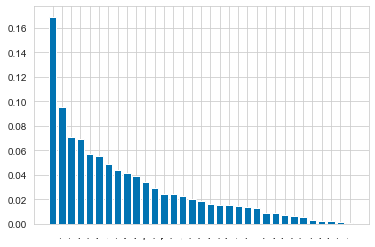

In [4]:
plt.bar(ALPHABET_SORTED[::-1], ALPHABET_RATES[ALPHABET_RATES_INDEX][::-1])

In [5]:
def cipher(text, p):
    return ''.join([p[ALPHABET_MAP[c]] for c in text if filter_chars(c)])

def decipher_naive(text):
    counts = count_chars(text)
    rates = np.array([counts[c] / sum(counts.values()) for c in ALPHABET])
    chars_sorted = ''.join(ALPHABET[np.argsort(rates)])
    plt.bar(ALPHABET[np.argsort(rates)][::-1], rates[np.argsort(rates)][::-1])
    words = text.split()
    key = ALPHABET[np.argsort(rates)][[np.where(ALPHABET_SORTED == c)[0][0] for c in ALPHABET]]
    return ' '.join([''.join([ALPHABET_SORTED[chars_sorted.index(c)] for c in word]) for word in words]), key

In [6]:
original_text = '''
Чайковского в Европе, может, и недооценивают в каких-то его параметрах, а в Японии обожают. 
Просто обожают! И в Китае тоже обожают. В Европе самым великим композитором России, наверное, 
и по праву тоже, считается Мусоргский. В Америке любят Рахманинова, естественно, они считают его своим. 
В каком-то смысле он и американский композитор тоже, всё-таки там провёл столько лет. 
Другое дело, что, живя в Америке, он очень мало написал. Вся основная доля его творчества была создана в России. 
Так что американцам я всегда говорю - это наш общий композитор, это наше общее достояние, и им это очень нравится. 
Есть, конечно, какие-то свои приоритеты, но хорошая музыка воспринимается во всех странах одинаково. 
'''

key = np.random.permutation(ALPHABET)
reverse_key = np.array([ALPHABET[np.where(key == c)[0][0]] for c in ALPHABET])
key_ = ''.join(key)

ciphered_text = cipher(original_text.lower(), key)

print(f'Ключ шифрования: {key_}')

Ключ шифрования: япмфушэвжрюитхлбгыщ доъцзнчсайекь


In [7]:
print(ciphered_text)

зпюибфщибубяфяэфыбгэяхбвэ ярялэшббцэлрфпк яфяипиръ бяэубягпыпхэ ыпъяпяфяьгблррябмбвпк ягыбщ бябмбвпк яряфяир пэя бвэябмбвпк яфяэфыбгэящпхахяфэтрирхяибхгбжр быбхяыбщщррялпфэылбэярягбягыпфдя бвэящзр пэ щьяхдщбыущирюяфяпхэыриэяткмь яыпъхплрлбфпяэщ эщ фэллбяблрящзр пк яэубящфбрхяфяипибх бящхащтэябляряпхэыриплщирюяибхгбжр быя бвэяфщ пиря пхягыбфтящ бтйибятэ яшыдубэяшэтбяз бяврфьяфяпхэыриэяблябзэлйяхптбялпгрщптяфщьябщлбфлпьяшбтьяэубя фбызэщ фпяматпящбжшплпяфяыбщщрря пияз бяпхэыриплцпхяьяфщэушпяубфбыкяяе бялпнябмчрюяибхгбжр быяе бялпнэябмчээяшбщ бьлрэярярхяе бябзэлйялыпфр щьяэщ йяиблэзлбяипирэ бящфбрягырбыр э аялбяъбыбнпьяхджаипяфбщгырлрхпэ щьяфбяфщэъящ ыплпъябшрлпибфбя


пейростроьо с асвода кояа  н лагоощалнсеб  с рернз о аьо девека вез е с мдолнн оыояеб  двот о оыояеб  н с рн еа  ояа оыояеб  с асвода текчк саунрнк рокдожн овок воттнн лесавлоа н до двесх  ояа тпн еа тм кхтовьтрнй с екавнра убым  везкелнлосе ат ат салло олн тпн еб  аьо тсонк с рерок о ткчтуа ол н екавнрелтрнй рокдожн ов  ояа ст ерн  ек двосу т оушро уа  гвхьоа гауо п о янсм с екавнра ол опалш кеуо леднтеу стм отлослем гоум аьо  совпат се ычуе тожгеле с воттнн  ер п о екавнрелщек м стаьге ьосовб  э о лею оыцнй рокдожн ов э о леюа оыцаа гот омлна н нк э о опалш лвесн тм ат ш ролапло рерна о тсон двновн а ч ло зовоюем кхжчре сотдвнлнкеа тм со стаз т велез огнлеросо 


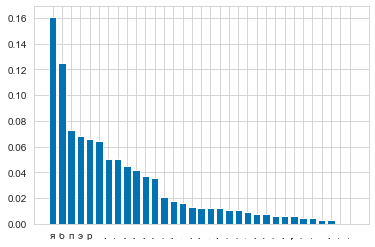

In [8]:
deciphered_text, deciphered_key = decipher_naive(ciphered_text)
print(deciphered_text)

In [9]:
print(f'Number of correctly decrypted letters is {sum(key == deciphered_key)}')

Number of correctly decrypted letters is 6


Видим что несколько букв мы смогли расшифровать корректно, достаточно очевидно совпадение по букве О, которая является самой распространенной, и еще несколько букв алгоритм угадал, но текст получился совершенно не читаемым.

Теперь посмотрим на частотность биграмм по всему корпусу текста и по нашему тестовому тексту отдельно.

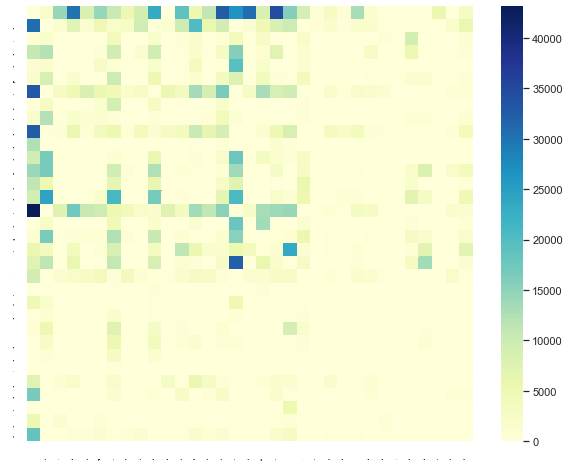

In [10]:
import seaborn as sns; 
sns.set()

plt.figure(figsize=(10,8))
data = np.array(BIGRAMS_RATES).reshape(33, 33)
ax = sns.heatmap(data, xticklabels=ALPHABET, yticklabels=ALPHABET, cmap="YlGnBu")

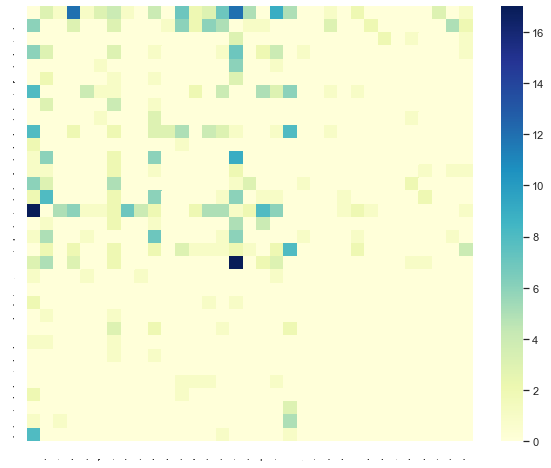

In [11]:
bigram_rates_text = np.array([original_text.count(bi) for bi in BIGRAMS])

plt.figure(figsize=(10,8))
data = np.array(bigram_rates_text).reshape(33, 33)
ax = sns.heatmap(data, xticklabels=ALPHABET, yticklabels=ALPHABET, cmap="YlGnBu")

Сразу видим хорошую схожесть в представлении хитмапы. Давайте посмотрим на хитмапу от зашифрованного текста.

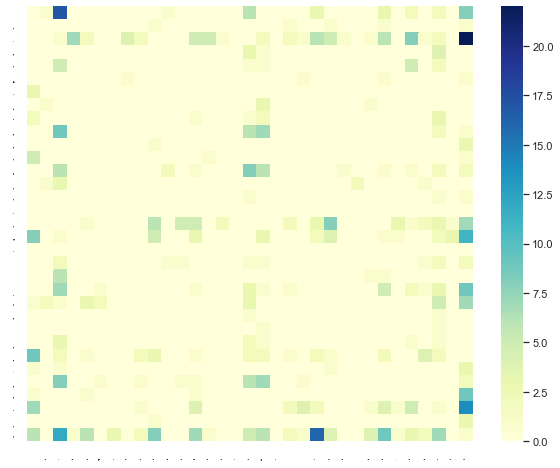

In [12]:
bigram_rates_text = np.array([ciphered_text.count(bi) for bi in BIGRAMS])

plt.figure(figsize=(10,8))
data = np.array(bigram_rates_text).reshape(33, 33)
ax = sns.heatmap(data, xticklabels=ALPHABET, yticklabels=ALPHABET, cmap="YlGnBu")

Видно, что все перемешалось, но теоретически можно как то восстановить исходный порядок.

In [13]:
def decipher_by_bigrams_naive(text):
    bigram_rates_text = np.array([text.count(bi) for bi in BIGRAMS])
    key = ['_' for _ in ALPHABET]
    i = 0
    index = np.argsort(bigram_rates_text)[::-1]
    while '_' in key and i < len(BIGRAMS):
        original_bigram = BIGRAMS_SORTED[::-1][i]
        current_bigram = BIGRAMS[index[i]]
        k1 = np.where(original_bigram[0] == ALPHABET)[0][0]
        k2 = np.where(original_bigram[1] == ALPHABET)[0][0]
        if key[k1] == '_' and current_bigram[0] not in key:
            key[k1] = current_bigram[0]
        if key[k2] == '_' and current_bigram[1] not in key:
            key[k2] = current_bigram[1]
        i += 1
    while '_' in key:
        i = key.index('_')
        for c in ALPHABET:
            if c not in key:
                key[i] = c
                break
    words = text.split()
    return ' '.join([''.join([ALPHABET[key.index(c)] for c in word]) for word in words]), key

In [14]:
decrypted, bigram_key = decipher_by_bigrams_naive(ciphered_text)

In [15]:
print(decrypted)

уиблонрломо н янгодя еофя  т ьяаоошяьтнич  н лилтз о ямо дигиея гиз и н пдоьтт оцофич  дгор о оцофич  т н лт ия  офя оцофич  н янгодя риеще няытлте лоедожт огое горртт ьинягьоя т до дгинс  офя рут ия рп есрогмрлтб н иеягтля ычцп  гизеиьтьони яр яр няььо оьт рут ич  ямо рноте н лилое о рещрыя оь т иеягтлиьрлтб лоедожт ог  офя нр илт  ие дгоны р оыюло ыя  агсмоя аяыо у о фтнп н иеягтля оь оуяью еиыо ьидтриы нрп орьоньип аоып ямо  ногуяр ни цщыи рожаиьи н горртт  ил у о иеягтлиьшие п нрямаи моногч  к о ьиэ оцхтб лоедожт ог к о ьиэя оцхяя аор опьтя т те к о оуяью ьгинт рп яр ю лоьяуьо лилтя о рнот дгтогт я щ ьо зогоэип есжщли нордгтьтеия рп но нряз р гиьиз оатьилоно 


In [20]:
print(f'Number of correctly decrypted letters is {sum(key == bigram_key)}')

Number of correctly decrypted letters is 2


Нужно как то по умному подбирать соответсвия между биграммами. В самом тупом варианте получилось еще хуже чем при посимвольном сравнении. Это из-за того, что вариантов гораздо больше, и больше шанс получить неверный матчинг при сравнении просто по частотам.

## MCMC

Алгоритм MCMC достаточно простой по свой структуре. Мы определяем функцию $\pi (x) = \prod_{\beta_1,\beta_2}F_R(\beta_1,\beta_2)^{F_X(\beta_1,\beta_2)}$ где $\beta_1,\beta_2$ - биграмма, $F_R$ - количество раз эта биграмма встретилась в исходном корпусе текстов, $F_X$ - кол-во раз встретилась в тексте X. От этого всего мы берем логарифм просто для того, чтобы было удобно считать. В итоге получаем функцию, которая будет чем больше тем схожей текст X будет по "биграммной структуре" к исходному корпусу.

Исходным пространством у нас является множество всех возможных перестановок ключа, двигаться по этому пространству мы будем с помощью случайных перестановк пар символов в ключе. Эти перестановки будут симметричны в смысле вероятностей перехода туда обратно, поэтому формула для MCMC алгоритма упрощается. Чтобы посчитать двинулись мы в сторону увелечения вероятности или нет, и на сколько, мы будем пользоавться функцией A(X, Y). И будем также задавать величину p - чем она будет больше, тем выше будет вероятность отклонить переход в сторону снижения. Я сделал постепенное увелечение p, чтобы по-началу алгоритм "попрыгал" в разные стороны но к концу как бы устремился в сторону максимального увелечения вероятности. Еще я сделал такой трюк, каждые K итерация я насильно стартую с точки максимального скора, мне показалось что так работает чуть лучше, чем делать полностью хаотичные блуждания.

In [37]:
def swap_random(seq):
    k = np.copy(seq)
    idx = range(len(seq))
    i1, i2 = np.random.choice(idx, 2)
    k[i1], k[i2] = k[i2], k[i1]
    return k

def bigram_score_function(text):
    bigram_rates_text = np.array([text.count(bi) for bi in BIGRAMS])
    return np.sum((bigram_rates_text + 1) * LOG_RATES)

def P(text, X):
    return bigram_score_function(cipher(text, X))

def A(text, X, Y, p):
    return (P(text, Y) / P(text, X)) ** p

def MCMC(ciphered_text, N = 500001):
    X = np.random.permutation(ALPHABET)

    key_list = []
    score_list = []

    rejected = 0
    
    for i in range(N):
        Y = swap_random(X)
        U = np.random.uniform()

        if U < A(ciphered_text, X, Y, min(i / 500., 500)):
            X = Y

            key_list.append(X)
            score_list.append(P(ciphered_text, X))
        else:
            rejected += 1

        if i % 10000 == 0:
            imax = np.argmax(np.array(score_list))
            X = key_list[imax]
            
        if i % 50000 == 0:
            imax = np.argmax(np.array(score_list))
            print(f'\nIteration {i}')
            print(f'rejected {rejected} out of 50000')
            print(f'max score: {score_list[imax]}')
            print(cipher(ciphered_text, key_list[imax]))
            rejected = 0
            
    return key_list[imax]

In [31]:
mcmc_key = MCMC(ciphered_text)


Iteration 0
rejected 0 out of 50000
max score: 8265.904508936545
хгйрдыирдъдуыулыэдслущдал унумлтдджлмныгк уыургрнз дулъдусгэгщл эгзугуыуцсдмннудшдагк усэди дудшдагк унуыурн глу далудшдагк уыулыэдслуигщпщуыльнрнщурдщсдфн дэдщуэдииннумгылэмдлунусдусэгыеу далуихн гл ицущеидэъирнйуыугщлэнрлуькшц уэгзщгмнмдыгули ли ылммдудмнуихн гк улъдуиыднщуыургрдщ дуищпиьлудмунугщлэнргмирнйурдщсдфн дэу далуыи грну гщусэдыьуи дьордуьл утэеъдлутльдух дуаныцуыугщлэнрлудмудхлмоущгьдумгснигьуыицудимдымгцутдьцулъду ыдэхли ыгушпьгуидфтгмгуыуэдиинну грух дугщлэнргмжгщуцуыилътгуъдыдэкуую думгвудшянйурдщсдфн дэую думгвлудшяллутди дцмнлунунщую дудхлмоумэгын ицули оурдмлхмдургрнл дуиыднусэндэн л пумдуздэдвгцущефпргуыдисэнмнщгл ицуыдуыилзуи эгмгзудтнмгрдыду

Iteration 50000
rejected 11953 out of 50000
max score: 10008.248868669842
фукмозсмово з езподе ношет и рецооьеризуют з мумиъто ево дупунетпуъ у з хдории огошуют дпосто огошуют и з митуе тоше огошуют з езподе сунбн зелимин мондощитопон поссии рузепрое и до дпузя

In [34]:
print(f'Number of correctly decrypted letters in MCMC algorithm is {sum(mcmc_key == reverse_key)}')

Number of correctly decrypted letters in MCMC algorithm is 22


Видим, что на 500т итерации алгоритм уже распознал 22 символа корректно, и более того текст уже получился читаемый а в некоторых кусках полностью совпадающий с оригиналом. Это произошло за счет того, что основные буквы сопоставились верно, ведь они и вносят основной частотый вклад в скор. А менее частотные уже перебираются так и сяк, в итоге сходимость все более замедляется с течением итераций.
Попробую теперь расшифровать сообщение из задания.

In [35]:
code = '''←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏'''
# Тут заменю на случайный буквы из алфавита просто для удобства в коде
ciphered_code = code
for i in range(len(Counter(ciphered_code).keys())):
    ciphered_code = ciphered_code.replace(list(Counter(code).keys())[i], ALPHABET[i])

In [38]:
MCMC(ciphered_code, N=10**6)


Iteration 0
rejected 0 out of 50000
max score: 5594.385991001645
тэ ьсеисеьщьйтсфъмдв зфичсь ьсбъыйьсфъмдв зфичсйткэйсусгйъоъсэъърютфьжскъйъмичс токъсбмъыьйвйзсэкъмттсеэтоъсеисеэтсэщт в ьсбмвеь зфъсьсбъ уыьйтсдвкэьдв зфичсрв  спвсбъэ тщфттсытйетмйътспвщвфьтскумэвсшъйжскъфтыфъсжсфьытоъсфтсъртювл

Iteration 50000
rejected 7119 out of 50000
max score: 6418.322536000151
епро мл мояозе васнтрьвлы оро фабзо васнтрьвлы зеипз ч хзаша паащуевод иазаслы решиа фсабозтзь пиасее мпеша мл мпе пяертро фстморьва о фарчбозе нтипонтрьвлы щтрр кт фапреявее безмесзае ктятвое ичспт эазд иавебва д вобеша ве ащеутй

Iteration 100000
rejected 17932 out of 50000
max score: 6482.838583358188
ензо лю лофоме житразяжюб озо чидмо житразяжюб мепнм у хмиси ниивгежой пимитюб зеспи чтидомамя нпитее лнеси лю лне нфезазо чталозяжи о чизудоме рапноразяжюб вазз ка чинзефжее демлетмие кафажое путна ъимй пижеджи й жодеси же ивегаш

Iteration 150000
rejected 24679 out of 50000
max score: 6549.409674351469
ерзи пы писиле ват

array(['е', 'с', 'л', 'и', ' ', 'в', 'ы', 'м', 'т', 'н', 'о', 'р', 'ж',
       'а', 'ь', 'й', 'п', 'д', 'к', 'у', 'ч', 'г', 'б', 'ш', 'я', 'з',
       'х', 'ю', 'ц', 'щ', 'э', 'ъ', 'ф'], dtype='<U1')

В итоге расшифровка заняла много итераций, но получилось вполне "нормально" и "легко прочитать" )) 

"если вы вимите норжальный или подти норжальный текст у чтого сообшения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный балл за послемнее детвертое замание курса хотя конедно я нидего не обешаю"

Триграмы я не проверял, чисто интуитивно думаю будет работать лучше на больших текстах и хуже на небольших. Потому что их сильно больше и их распределение скорее будет непохоже на общее распределение в маленьких текстах.

Я могу в качестве применения привести следующий случай. Мне как то дали один очень старый бэкап из переписки в ICQ. Ничем открыть его было невозможно, и по байтам прочесть было сложно, потому что там все было в перемешку со служебными символами, которые выскакивали где нибудь внезапно, и формат был непонятен. В итоге что то мы расшифровали, но получилось с кучей мусора и коряво. Может можно было бы засунуть байткод в этот алгоритм и что то получить более читаемое -) 